# Linear regression with one variable (univariate linear regression)

## Loading the dataset

Load sample data (number of reservations and number of pizzas sold) from pizza.txt.

|Reservations (x)|Pizzas (y)|
|----------------|---------|
|13              |33      |
|2               |16      |
|14              |32      |
|23              |51      |
|...             |...     |

(x,y) = one training example\
(x<sup>(i)</sup>,y<sup>(i)</sup>) = i<sup>th</sup> training example

In [29]:
import numpy as np               #imports numpy with an alias of np

X, Y = np.loadtxt("pizza.txt",   # Load contents of the pizza.txt and populate arrays X and Y with the data
                  skiprows = 1,  # Skip the first row that contains headers
                  unpack = True) # Unpacks the data in two separate columns to separate arrays X and Y

Print out number of reservations (X)

In [30]:
X

array([13.,  2., 14., 23., 13., 13.,  1., 18.,  7., 10., 26.,  3.,  3.,
       21., 22.,  2., 27.,  6., 10., 18., 15.,  9., 26.,  8., 15., 10.,
       21.,  5.,  6., 13.])

Print out number of pizzas sold (Y)

In [31]:
Y

array([33., 16., 32., 51., 27., 25., 16., 34., 22., 17., 29., 15., 15.,
       32., 37., 13., 44., 16., 21., 37., 30., 26., 34., 23., 39., 27.,
       37., 17., 18., 23.])

Number of training examples (m)

In [32]:
X.size

30

Plot number of reservations and number of pizzas sold by using the Matplotlib

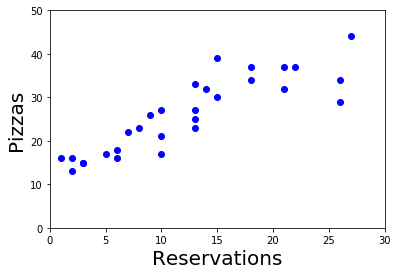

In [33]:
# This directive tells Jupyter to draw matplotlib plots inside the web page
%matplotlib inline

import matplotlib.pyplot as plt

plt.xlabel("Reservations", fontsize=20)     # Print the X label
plt.ylabel("Pizzas", fontsize=20)           # Print the Y label
plt.axis([0, 30, 0, 50])                    # Both axes range from 0 to 50
plt.plot(X, Y, "bo")                        # Plot the data as blue circles (that's what "bo" stands for)
plt.show()                                  # Visualize the diagram

## Making a hypothesis of the model

<img style="float: left;" src="linear_regression_with_one_variable.png" width=50% height=50%>

Let us to approximate the data above with linear regression. That is, with a line.

Our hypothesis would thus be:
h<sub>Θ</sub><sup>(x)</sup> = Θ<sub>0</sub> + Θ<sub>1</sub>x\
or shorthand
h(x) = Θ<sub>0</sub> + Θ<sub>1</sub>x, Θ<sub>0</sub> and Θ<sub>1</sub> being parameters of the function.

Usually line function is wrote as the following\
f(x) = wx + b, or\
y = wx + b\
\
where:
* x = x-coordinate
* y = y-coordinate
* w = weight or scaling factor (adjusts the angle of the line)
* b = bias or shift (tells bias towards the origo i.e. where from the line starts)

Translating above to code we get the predict() function:

In [34]:
def predict(X, w, b):  # Number of reservations as an array, weight, bias
    return X * w + b   # Return prediction of pizzas sold

Let's say that we already found a line that approximates the points, and this line has w = 2.1 and b = 7.3 (for now we give parameters of a line like this, later on we shall use machine learning to produce the parameters of a optimal line i.e. a line with least amount of error). How many pizzas should we expect to sell if we got 10 reservations? Here's the answer:

In [35]:
predict(14, 1.2, 12)

28.8

Note that we can pass an entire NumPy array to predict() instead of a single number. NumPy automatically applies the multiplication and the sum inside predict() to all the elements in the array. This is called broadcasting:

In [36]:
X = np.array([14, 5, 7])
P = predict(X, 1.2, 12)

In [37]:
P

array([28.8, 18. , 20.4])

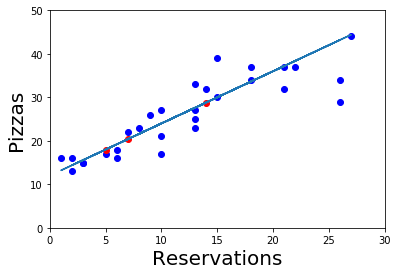

In [38]:
X, Y = np.loadtxt("pizza.txt", skiprows=1,unpack=True)

# This directive tells Jupyter to draw matplotlib plots inside the web page
%matplotlib inline

import matplotlib.pyplot as plt

P = predict(X, 1.2, 12)

X2 = np.array([14, 5, 7]) 
P2 = predict(X2, 1.2, 12)

plt.xlabel("Reservations", fontsize=20)     # Print the X label
plt.ylabel("Pizzas", fontsize=20)           # Print the Y label
plt.axis([0, 30, 0, 50])                    # Both axes range from 0 to 50
plt.plot(X, Y, "bo")                        # Plot the data as blue circles (that's what "bo" stands for)
plt.plot(X2, P2, "ro")                      # Plot the predicted values as red circles
plt.plot(X, P)                              # Plot the given linear function
plt.show()                                  # Visualize the diagram

## Implementing training

Before able to implement training, we need to be able to define how to find parameters of the linear function h<sub>Θ</sub>(x) = Θ<sub>0</sub> + Θ<sub>1</sub>x so that the function fits as well as possible with the training data i.e. so that h<sub>Θ</sub>(x) is as close as possible with a y in the training data.

For this purpose we need to define a loss function, and will use the mean squared error function for this purpose. This is the most commonly used function, which fits well also with the linear regression function:

<img style="float: left;" src="loss_function.png" width=50% height=50%>

Error is squared so that the result is always a positive number. Usually the function is average, not half of the average as here, but it makes no difference.

Let's illustrate this with an example with a simplified hypothesis, where the Θ<sub>0</sub> is always 0, i.e. h<sub>Θ</sub>(x) = Θ<sub>1</sub>x i.e. the simplified loss function is as the following:

<img style="float: left;" src="loss_function2.png" width=50% height=50%>

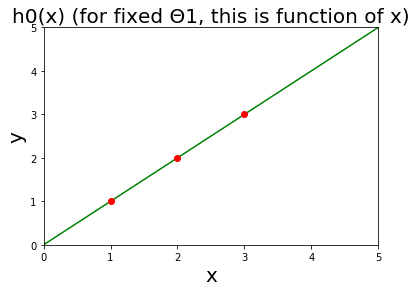

In [39]:
import matplotlib.pyplot as plt

# Draw matplotlib plots inside this notebook
%matplotlib inline

# Compute losses for w ranging from -1 to 4
X0 = np.array([0, 5])
Y0 = np.array([0, 5])

# plottaa tähän oikealla kaavalla... theta1=0 ja theta1=0,5 !!!
# Plot weights and losses
plt.title("h0(x) (for fixed Θ1, this is function of x)", fontsize=20)
plt.xlabel("x", fontsize=20)
plt.ylabel("y", fontsize=20)
plt.axis([0, 5, 0, 5])
plt.plot(X0, Y0, color = "green")
plt.plot(1, 1, "ro")
plt.plot(2, 2, "ro")
plt.plot(3, 3, "ro")
plt.show()

Red dots above represent the real values while the green line represent the perfect (loss = 0) function (prediction) to match with the real data:

<img style="float: left;" src="loss_function3.png" width=50% height=50%>

In [ ]:
Would the 

Turning this to code results to a function that takes the datasets (X and Y) and a line (defined by w and b):

In [40]:
# The used loss function here is a "mean squared error"
def loss(X, Y, w, b): # Y contains real values of the pizza sold
    predictions = predict(X, w, b)
    #return np.average((predictions - Y) ** 2) # ** is power operation in Python i.e. this is squared -> returns only positive numbers
    return np.average((predictions - Y) ** 2) / 2 # ** is power operation in Python i.e. this is squared -> returns only positive numbers
              # mean               # squared   # half

Let's try it out with the data from pizza.txt and two made-up values for the line's parameters:

In [41]:
X, Y = np.loadtxt("pizza.txt", skiprows = 1, unpack = True)

In [42]:
loss(X, Y, 1.2, 12)

11.889333333333338

Next we need to define a function that tries to minimize the loss or error of the linear function by finding the parameters that result to least loss by using the loss function defined above i.e. minimize parameters of the function.

The function below takes a dataset (X and Y) and it returns a line that approximates it. It also takes a number of iterations and a learning rate (lr):

In [43]:
# Simple training algorithm, that does not e.g. try to change w and b at the same time
def simple_train(X, Y, iterations, lr): # lr = learning rate
    w = b = 0 # Start with some line
    for i in range(iterations):
        current_loss = loss(X, Y, w, b)
        print("Iteration %4d => Loss: %.6f" % (i, current_loss))
                
        if loss(X, Y, w - lr, b) < current_loss:
            w -= lr
        elif loss(X, Y, w + lr, b) < current_loss:
            w += lr
        elif loss(X, Y, w, b - lr) < current_loss:
            b -= lr
        elif loss(X, Y, w, b + lr) < current_loss:
            b += lr
        else:
            return w, b, current_loss

    raise Exception("Couldn't find a result within %d iterations" % iterations)

We have everything we need to find a line that approximates our pizza.txt dataset:

In [44]:
w1, b1, loss1 = simple_train(X, Y, 10000, 0.01)

Iteration    0 => Loss: 406.433333
Iteration    1 => Loss: 402.410273
Iteration    2 => Loss: 398.409093
Iteration    3 => Loss: 394.429793
Iteration    4 => Loss: 390.472373
Iteration    5 => Loss: 386.536833
Iteration    6 => Loss: 382.623173
Iteration    7 => Loss: 378.731393
Iteration    8 => Loss: 374.861493
Iteration    9 => Loss: 371.013473
Iteration   10 => Loss: 367.187333
Iteration   11 => Loss: 363.383073
Iteration   12 => Loss: 359.600693
Iteration   13 => Loss: 355.840193
Iteration   14 => Loss: 352.101573
Iteration   15 => Loss: 348.384833
Iteration   16 => Loss: 344.689973
Iteration   17 => Loss: 341.016993
Iteration   18 => Loss: 337.365893
Iteration   19 => Loss: 333.736673
Iteration   20 => Loss: 330.129333
Iteration   21 => Loss: 326.543873
Iteration   22 => Loss: 322.980293
Iteration   23 => Loss: 319.438593
Iteration   24 => Loss: 315.918773
Iteration   25 => Loss: 312.420833
Iteration   26 => Loss: 308.944773
Iteration   27 => Loss: 305.490593
Iteration   28 => Lo

Iteration 1282 => Loss: 12.462173
Iteration 1283 => Loss: 12.454423
Iteration 1284 => Loss: 12.446773
Iteration 1285 => Loss: 12.439223
Iteration 1286 => Loss: 12.431773
Iteration 1287 => Loss: 12.424423
Iteration 1288 => Loss: 12.417173
Iteration 1289 => Loss: 12.410023
Iteration 1290 => Loss: 12.402973
Iteration 1291 => Loss: 12.396023
Iteration 1292 => Loss: 12.389173
Iteration 1293 => Loss: 12.382423
Iteration 1294 => Loss: 12.375773
Iteration 1295 => Loss: 12.369223
Iteration 1296 => Loss: 12.362773
Iteration 1297 => Loss: 12.362060
Iteration 1298 => Loss: 12.354443
Iteration 1299 => Loss: 12.346927
Iteration 1300 => Loss: 12.339510
Iteration 1301 => Loss: 12.332193
Iteration 1302 => Loss: 12.324977
Iteration 1303 => Loss: 12.317860
Iteration 1304 => Loss: 12.310843
Iteration 1305 => Loss: 12.303927
Iteration 1306 => Loss: 12.297110
Iteration 1307 => Loss: 12.290393
Iteration 1308 => Loss: 12.283777
Iteration 1309 => Loss: 12.277260
Iteration 1310 => Loss: 12.270843
Iteration 1311

In [45]:
print("Trained with a simple loss function: loss = %.6f w = %.6f b = %.6f" % (loss1, w1, b1))

Trained with a simple loss function: loss = 11.431783 w = 1.100000 b = 12.930000


Here is the line visualized over the examples:

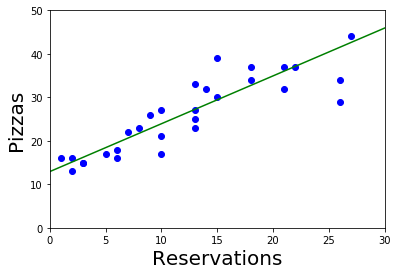

In [47]:
plt.xlabel("Reservations", fontsize=20)
plt.ylabel("Pizzas", fontsize=20)
plt.axis([0, 30, 0, 50])
plt.plot(X, Y, "bo")

# Plot the line:
plt.plot([0, 50], [b1, predict(50, w1, b1)], color="g")

# Visualize the diagram:
plt.show()

Simple training function above works, but has it's limitations. By changing w and b separately we can't be sure we find the most optimal line fitting with the data i.e. having the least amount of loss.

The training function above could be improved to take all the possible combination of w and b into account, but if we would have more parameters to the function it would get way too complex and slow in no time.

Before implementing a new training algorithm, let's visualize the loss to see how the output of the loss-function changes when its inputs change and plot J(-1..5): 

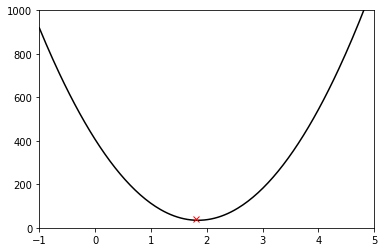

In [49]:
import matplotlib.pyplot as plt

# Draw matplotlib plots inside this notebook
%matplotlib inline

# Compute losses for w ranging from -1 to 5
weights = np.linspace(-1.0, 5.0, 200)
losses = [loss(X, Y, w1, 0) for w1 in weights] # b is set to constant value of 0 here to simplify the plot

# Plot weights and losses
plt.axis([-1, 5, 0, 1000])
#plt.xticks(fontsize = 15)
#plt.yticks(fontsize = 15)
#plt.xlabel("Weight")
#plt.ylabel("Loss")
plt.plot(weights, losses, color = "black")
plt.plot(1.8, 40, "rx") # Approximate of the point we wan't to find by using gradient descent
plt.show()

The idea of our algorithm is to start from a random point at the loss curve. Algorithm will check 

<img style="float: left;" src="gradient_descent.png" width=50% height=50%>

Function below defines gradient training, which is much better and widely used in machine learning:

In [198]:
def gradient_train(X, Y, w, b):
    w_gradient = np.average(2 * X* (predict(X, w, b) - Y))
    b_gradient = np.average(2 * (predict(X, w, b) - Y))
    return (w_gradient, b_gradient)

In [199]:
gradient(X, Y, 2, 3)

NameError: name 'gradient' is not defined

In [200]:
# Gradient descent based training algorithm
def train(X, Y, iterations, lr): # lr = learning rate
    w = b = 0 # Start with some line
    for i in range(iterations):
        current_loss = loss(X, Y, w, b)
        print("Iteration %4d => Loss: %.6f" % (i, current_loss))
        w_gradient, b_gradient = gradient(X, Y, w, b)
        w -= w_gradient * lr
        b -= b_gradient * lr
    return(w, b)



We have everything we need to find a line that approximates our pizza.txt dataset:

In [201]:
w, b = train(X, Y, 10000, 0.001)

Iteration    0 => Loss: 406.433333


NameError: name 'gradient' is not defined

In [202]:
w

1.1000000000000008

In [203]:
b

12.929999999999769

Trained with a simple loss function: loss = 22.863567, w = 1.1000000000000008, b = 12.929999999999769

Trained with a gradient descent function: loss = 22.843833, w = 1.0848258524488616, b = 13.108507160092502

Here is the line visualized over the examples:

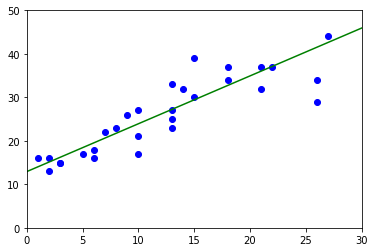

In [206]:
# Plot the examples like we did before:
#plt.xlabel("Reservations", fontsize=20)
#plt.ylabel("Pizzas", fontsize=20)
plt.axis([0, 30, 0, 50])
plt.plot(X, Y, "bo")

# Plot the line:
plt.plot([0, 50], [b, predict(50, w, b)], color="g")

# Visualize the diagram:
plt.show()

Finally, let's use this model to predict how many pizzas we're going to sell if we got 42 reservations:

In [207]:
#reservations = 42
#predict(reservations, w, b)

So we should prepare enough dough for about 60 pizzas. We just built a system that learns!